# Proceso Modelamiento ML Ops - Yahoo Finance - Nvidia
## Realizado por Daniel Muñoz Palma

In [3]:
#!pip install yfinance -q

In [25]:
!pip install prophet -q


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Librerias

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## 1. Punto: Extraer datos históricos de la compañía Nvidia y sus componentes desde Yahoo Finance utilizando Python

In [6]:
nvidia = yf.Ticker("NVDA")

# Se descargar datos históricos de NVDAD últimos 10 años
hist = nvidia.history(period="10y")

In [7]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-06-19 00:00:00-04:00,0.530975,0.535331,0.524440,0.529280,355656000,0.0,0.0
2015-06-22 00:00:00-04:00,0.530248,0.533153,0.519116,0.527102,514236000,0.0,0.0
2015-06-23 00:00:00-04:00,0.528070,0.532185,0.509435,0.513550,414064000,0.0,0.0
2015-06-24 00:00:00-04:00,0.512824,0.515486,0.506047,0.508467,253368000,0.0,0.0
2015-06-25 00:00:00-04:00,0.508467,0.515486,0.508467,0.512339,350460000,0.0,0.0


##  Gráfico Comportamiento histórico NVIDIA ("Precio de Cierre")

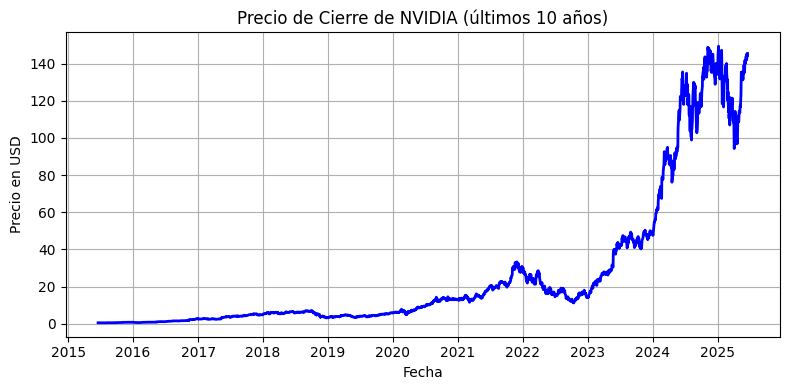

In [10]:
hist = hist.reset_index()

plt.figure(figsize=(8, 4))
plt.plot(hist['Date'], hist['Close'], color='blue', linewidth=2)

plt.title("Precio de Cierre de NVIDIA (últimos 10 años)")
plt.xlabel("Fecha")
plt.ylabel("Precio en USD")
plt.grid(True)
plt.tight_layout()
plt.show()


## Modelos 

In [14]:
df = hist[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5364\2788342777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [16]:
df['ds'] = df['ds'].dt.tz_localize(None)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5364\1227424457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = df['ds'].dt.tz_localize(None)


In [17]:
df

,ds,y
0,2015-06-19,0.529280
1,2015-06-22,0.527102
2,2015-06-23,0.513550
3,2015-06-24,0.508467
4,2015-06-25,0.512339
...,...,...
2510,2025-06-12,145.000000
2511,2025-06-13,141.970001
2512,2025-06-16,144.690002
2513,2025-06-17,144.119995


In [24]:
from prophet import Prophet

ModuleNotFoundError: No module named 'prophet'

In [22]:
model = Prophet(daily_seasonality=True)
model.fit(df)

NameError: name 'Prophet' is not defined

In [ ]:
# Predecir los próximos 30 días
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Graficar resultado
model.plot(forecast);

In [ ]:
from matplotlib import pyplot as plt

# Descomposición de la serie
fig = model.plot_components(forecast)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Unir forecast y datos reales
df_pred = forecast[['ds', 'yhat']].copy()
df_eval = df.merge(df_pred, on='ds')

# Variables reales vs. predichas
y_true = df_eval['y']
y_pred = df_eval['yhat']

# Cálculo de errores
mae  = mean_absolute_error(y_true, y_pred)
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Crear DataFrame resumen
error_df = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'RMSE', 'MAPE(%)'],
    'Valor': [mae, mse, rmse, mape]
})

# Redondear para presentación
error_df['Valor'] = error_df['Valor'].round(2)

error_df